# MobileNetV3 Model with Kaggle data

source of dataset: [https://www.kaggle.com/datasets/gpiosenka/100-bird-species](https://www.kaggle.com/datasets/gpiosenka/100-bird-species)

References used within this notebook:
- [1] [https://www.tensorflow.org/tutorials/images/classification](https://www.tensorflow.org/tutorials/images/classification)
- [2] [https://www.tensorflow.org/tutorials/load_data/images](https://www.tensorflow.org/tutorials/load_data/images)
- [3] [https://keras.io/api/applications/#usage-examples-for-image-classification-models](https://keras.io/api/applications/#usage-examples-for-image-classification-models)
- [4] [https://www.kaggle.com/code/abduulrahmankhalid/birds-species-prediction-mobilenetv2-acc-95](https://www.kaggle.com/code/abduulrahmankhalid/birds-species-prediction-mobilenetv2-acc-95)
- [5] [https://keras.io/guides/transfer_learning/](https://keras.io/guides/transfer_learning/)

---

# Content
### 1) Get data insights
### 2) Train the model
### 3) Evaluation
### 4) Retrain model
### 5) Making some predictions

---

# 1) Get data insights

In [1]:
import os
import pathlib
import random
import numpy as np
import pandas as pd
import PIL
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow import keras

#### Set paths to data

In [2]:
# Get current absolute path of parent folder of this file
path_notebooks = os.path.dirname(os.path.abspath('3_MobileNetV3_Kaggle_finetuned'))

# Get path of parent directory, i.e. path to repo
path = os.path.abspath(os.path.join(path_notebooks, os.pardir))

train_dir = path + '/data/data_2/train/'
val_dir = path + '/data/data_2/valid/'

# create pathlib object from string train_dir (path to train directory)
train_dir_pl = pathlib.Path(train_dir)

In [3]:
# How many training images do we have?
image_count = len(list(train_dir_pl.glob('*/*.jp*')))
print(f'Number of training samples: {image_count}')

Number of training samples: 70626


## Load data using a Keras utility

In [4]:
# Define parameters
BATCH_SIZE = 16
IMG_HEIGHT = 300
IMG_WIDTH = 300

In [5]:
# Import data
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                      color_mode='rgb',
                                                      shuffle=True,
                                                      label_mode = 'categorical',
                                                      batch_size = BATCH_SIZE,
                                                      image_size = (IMG_HEIGHT, IMG_WIDTH),
                                                      seed=None,
                                                      validation_split=None,
                                                      crop_to_aspect_ratio=True,
                                                      interpolation='bilinear')

val_ds = tf.keras.utils.image_dataset_from_directory(val_dir,
                                                      color_mode='rgb',
                                                      label_mode ='categorical',
                                                      batch_size = BATCH_SIZE,
                                                      image_size = (IMG_HEIGHT, IMG_WIDTH),
                                                      seed=None,
                                                      validation_split=None,
                                                      crop_to_aspect_ratio=True,
                                                      interpolation='bilinear')

Found 70626 files belonging to 450 classes.
Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Found 2250 files belonging to 450 classes.


2022-11-04 06:29:30.775966: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-04 06:29:30.776317: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
# Get class names
class_names = train_ds.class_names
print(class_names)

['ABBOTTS BABBLER', 'ABBOTTS BOOBY', 'ABYSSINIAN GROUND HORNBILL', 'AFRICAN CROWNED CRANE', 'AFRICAN EMERALD CUCKOO', 'AFRICAN FIREFINCH', 'AFRICAN OYSTER CATCHER', 'AFRICAN PIED HORNBILL', 'ALBATROSS', 'ALBERTS TOWHEE', 'ALEXANDRINE PARAKEET', 'ALPINE CHOUGH', 'ALTAMIRA YELLOWTHROAT', 'AMERICAN AVOCET', 'AMERICAN BITTERN', 'AMERICAN COOT', 'AMERICAN FLAMINGO', 'AMERICAN GOLDFINCH', 'AMERICAN KESTREL', 'AMERICAN PIPIT', 'AMERICAN REDSTART', 'AMERICAN WIGEON', 'AMETHYST WOODSTAR', 'ANDEAN GOOSE', 'ANDEAN LAPWING', 'ANDEAN SISKIN', 'ANHINGA', 'ANIANIAU', 'ANNAS HUMMINGBIRD', 'ANTBIRD', 'ANTILLEAN EUPHONIA', 'APAPANE', 'APOSTLEBIRD', 'ARARIPE MANAKIN', 'ASHY STORM PETREL', 'ASHY THRUSHBIRD', 'ASIAN CRESTED IBIS', 'ASIAN DOLLARD BIRD', 'AUCKLAND SHAQ', 'AUSTRAL CANASTERO', 'AUSTRALASIAN FIGBIRD', 'AVADAVAT', 'AZARAS SPINETAIL', 'AZURE BREASTED PITTA', 'AZURE JAY', 'AZURE TANAGER', 'AZURE TIT', 'BAIKAL TEAL', 'BALD EAGLE', 'BALD IBIS', 'BALI STARLING', 'BALTIMORE ORIOLE', 'BANANAQUIT', 'BAN

### First visual impression
- using PIL (python image library) for first two images
- using matplotlib.image for two additional images

In [7]:
# Create list of paths to all birds of class 'ABBOTTS BABBLER' and show first two birds
abbotts_babbler = list(train_dir_pl.glob('ABBOTTS BABBLER/*'))

Image shape: (224, 224)


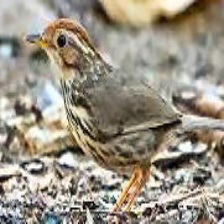

In [8]:
img1 = PIL.Image.open(str(abbotts_babbler[0]))
print(f"Image shape: {img1.size}")
img1

Image shape: (224, 224)


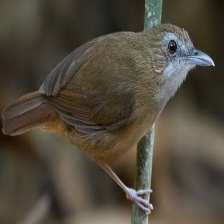

In [9]:
img2 = PIL.Image.open(str(abbotts_babbler[1]))
print(f"Image shape: {img2.size}")
img2

The following function is taken from [4]

In [10]:
def view_random_image(target_dir, target_class):
  # setting up the image directory
  target_folder = target_dir + target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #read image and plotting it
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (224, 224, 3)


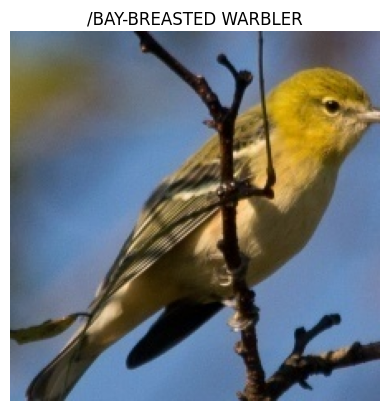

In [11]:
img3 = view_random_image(target_dir = train_dir,
                        target_class = '/BAY-BREASTED WARBLER'
                        )

Image shape: (224, 224, 3)


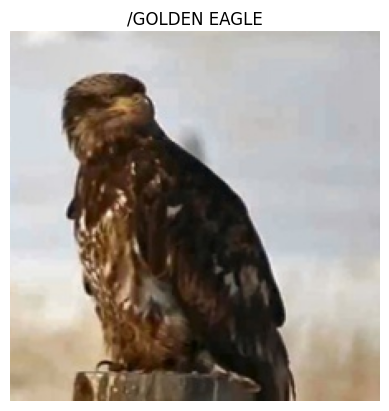

In [12]:
img4 = view_random_image(target_dir = train_dir,
                        target_class = '/GOLDEN EAGLE'
                        )

#### Additional visualizations

2022-11-04 06:29:31.316944: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


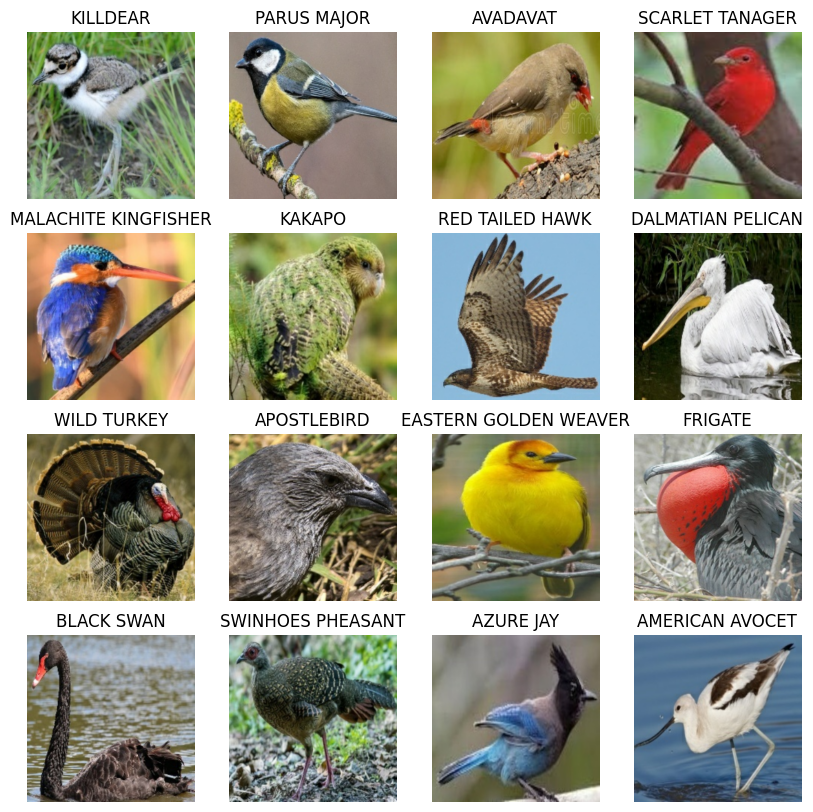

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    #plt.title(class_names[labels[i]])
    plt.title(class_names[labels[i].numpy().argmax()])
    plt.axis("off")

### Configure the dataset for performance

In [14]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

---

# 2) Train the model

### Define Hyperparameters

In [15]:
NUM_EPOCHS = 20
NUM_CLASSES = len(class_names)
LEARNING_RATE = 0.03

## Set up model

#### MobileNetV3 special feature:

``` Note: each Keras Application expects a specific kind of input preprocessing. For MobileNetV3, by default input preprocessing is included as a part of the model (as a Rescaling layer), and thus tf.keras.applications.mobilenet_v3.preprocess_input is actually a pass-through function. In this use case, MobileNetV3 models expect their inputs to be float tensors of pixels with values in the [0-255] range. At the same time, preprocessing as a part of the model (i.e. Rescaling layer) can be disabled by setting include_preprocessing argument to False. With preprocessing disabled MobileNetV3 models expect their inputs to be float tensors of pixels with values in the [-1, 1] range. ```

In [16]:
# 1. Create a base pre-trained model with tf.keras.applications
base_model = tf.keras.applications.MobileNetV3Large(include_top=False, weights='imagenet', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# 2. Freeze the base model
base_model.trainable = False

# 3. Create inputs into models
inputs = tf.keras.layers.Input(shape =(IMG_HEIGHT, IMG_WIDTH, 3), name="input-layer")

# 4. Preprocessing according to pre-trained model *)
x = tf.keras.applications.mobilenet_v3.preprocess_input(inputs)

# 5. Pass the inputs
x = base_model(x)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(NUM_CLASSES, activation="softmax", name="output-layer")(x)

# 8. Combine the inputs with outputs into a model
model = tf.keras.Model(inputs, outputs)

# *) the tf.keras.applications.mobilenet_v3.preprocess_input does exist, but has no effect:
# https://www.tensorflow.org/api_docs/python/tf/keras/applications/mobilenet_v3/preprocess_input
# "A placeholder method for backward compatibility." 
# The preprocessing logic has been included in the mobilenet_v3 model implementation. Users are no longer required to 
# call this method to normalize the input data. This method does nothing and only kept as a placeholder to align the 
# API surface between old and new version of model.
# Returns: Unchanged numpy.array or tf.Tensor.

Shape after passing inputs through base model: (None, 10, 10, 960)
Shape after GlobalAveragePooling2D: (None, 960)


### Compile Model

In [17]:
model.compile(loss = "categorical_crossentropy",
    optimizer = tf.keras.optimizers.Adam(learning_rate = LEARNING_RATE),
    metrics = ["accuracy"])

### CallBacks

In [18]:
train_callbacks = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy", patience=5, restore_best_weights=True
    )
]

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (InputLayer)    [(None, 300, 300, 3)]     0         
                                                                 
 MobilenetV3large (Functiona  (None, 10, 10, 960)      2996352   
 l)                                                              
                                                                 
 global_average_pooling_laye  (None, 960)              0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output-layer (Dense)        (None, 450)               432450    
                                                                 
Total params: 3,428,802
Trainable params: 432,450
Non-trainable params: 2,996,352
_________________________________________________________________


### Train the model

In [20]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=NUM_EPOCHS,
    #steps_per_epoch = len(train_ds),
    #validation_steps = int(0.25*len(val_ds)),
    callbacks=train_callbacks
)

Epoch 1/20


2022-11-04 06:29:35.595115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


2705/4415 [=================>............] - ETA: 3:34 - loss: 12.1383 - accuracy: 0.5842

: 

: 

---

# 3) Evaluation

The following function is taken from [4]

In [ ]:
def plot_loss_curves(history):

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  #plot loss
  plt.plot(epochs, loss, label = "training_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  #plot accuracy
  plt.figure() 
  plt.plot(epochs, accuracy, label = "training_accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

In [ ]:
plot_loss_curves(history)

### Save model

In [ ]:
# Save the entire model as a SavedModel.
#!mkdir -p saved_model

# make new folder 'saved_model' if it does not already exist
if not os.path.isdir(path + '/saved_model'):
    os.makedirs(path + '/saved_model')

#model.save(path + '/saved_model/MobileNetV3_Kaggle_p300_e20')

---

# 4) Retrain model

For an example, see https://keras.io/api/applications/ at the bottom **Fine-tune InceptionV3 on a new set of classes**

## Freeze top layers of Base Model

In [ ]:
# To begin fine-tuning lets start by setting the last 10 layers as trainable
base_model.trainable = True

# Un-freeze last 10 layers
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile (we have to compile model every time there is a change)
model.compile(loss = "categorical_crossentropy",
        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.1*LEARNING_RATE), # when fine-tuning you typically want to lower lr by 10x
        metrics = ["accuracy"] )

In [ ]:
# Check which layers are trainable
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

In [ ]:
# Now we have unfrozen some of the layers on the top 
print(len(model.trainable_variables))

## Fine-Tuning and Refitting

In [ ]:
fine_tune_epochs = NUM_EPOCHS + 5

# Refit the model
history_2 = model.fit(train_ds,
                       epochs = fine_tune_epochs,
                       validation_data = val_ds,
                       #validation_steps = int(0.25*len(val_data)),
                       initial_epoch =  history.epoch[-1],) # Start the epoch where it left before

In [ ]:
plot_loss_curves(history_2)

---

# 5) Making some predictions

The following function is taken from [4]

In [ ]:
# Creating a function that preprocess the custom data
def load_and_prep_image(filename, img_shape = IMG_HEIGHT):
  img = tf.io.read_file(filename) #read image
  img = tf.image.decode_image(img) # decode the image to a tensor
  img = tf.image.resize(img, size = [img_shape, img_shape]) # resize the image
  img = img/255. # rescale the image
  return img

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

Get test files

In [ ]:
amsel = path + '/data/data_2/images to test/Amsel.jpeg'
blaumeise = path + '/data/data_2/images to test/blaumeise.jpeg'
buchfink = path + '/data/data_2/images to test/buchfink.jpeg'
elster = path + '/data/data_2/images to test/elster.jpeg'
feldsperling = path + '/data/data_2/images to test/feldsperling.jpeg'
firefinch = path + '/data/data_2/images to test/firefinch.jpg'
gruenfink = path + '/data/data_2/images to test/grünfink.jpeg'
haussperling = path + '/data/data_2/images to test/haussperling.jpeg'
kohlmeise = path + '/data/data_2/images to test/Kohlmeise.jpeg'
mauersegler = path + '/data/data_2/images to test/mauersegler.jpeg'
mehlschwalbe = path + '/data/data_2/images to test/mehlschwalbe.jpeg'
rotkehlchen = path + '/data/data_2/images to test/Rotkehlchen.jpeg'
star = path + '/data/data_2/images to test/Star.jpeg'

In [ ]:
# amsel
pred_and_plot(model,amsel, class_names)

In [ ]:
#blaumeise
pred_and_plot(model,blaumeise, class_names)

In [ ]:
#buchfink
pred_and_plot(model,buchfink, class_names)

In [ ]:
#elster
pred_and_plot(model,elster, class_names)

In [ ]:
#feldsperling
pred_and_plot(model,feldsperling, class_names)

In [ ]:
#firefinch
pred_and_plot(model,firefinch, class_names)

In [ ]:
#gruenfink
pred_and_plot(model,gruenfink, class_names)

In [ ]:
#haussperling
pred_and_plot(model,haussperling, class_names)

In [ ]:
#kohlmeise
pred_and_plot(model,kohlmeise, class_names)

In [ ]:
#mauersegler
pred_and_plot(model,mauersegler, class_names)

In [ ]:
#mehlschwalbe
pred_and_plot(model,mehlschwalbe, class_names)

In [ ]:
# rotkehlchen
pred_and_plot(model,rotkehlchen, class_names)

In [ ]:
# star
pred_and_plot(model,star, class_names)